# Sinais de trade com Python

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import ta

In [5]:
# Baixe os dados
data = yf.download("TAEE11.SA", period="1y")

data['SMA10'] = ta.trend.sma_indicator(data['Close'], window=10)
data['SMA20'] = ta.trend.sma_indicator(data['Close'], window=20)

[*********************100%***********************]  1 of 1 completed


In [6]:
# Gerar sinais de trade
data['Signal'] = np.where(data['SMA10'] > data['SMA20'], 1, -1)

# Calcular o retorno da estratégia
data['Return'] = data['Close'].pct_change() * data['Signal'].shift(1)

data


,Open,High,Low,Close,Adj Close,Volume,SMA10,SMA20,Signal,Return
Date,,,,,,,,,,
2022-03-10,40.959999,41.439999,40.490002,41.090000,36.486431,2067900,NaN,NaN,-1,NaN
2022-03-11,41.349998,41.560001,40.680000,40.700001,36.140125,1350200,NaN,NaN,-1,0.009491
2022-03-14,40.939999,41.189999,40.650002,40.650002,36.095730,2298900,NaN,NaN,-1,0.001228
2022-03-15,40.650002,41.189999,40.500000,41.009998,36.415394,2615200,NaN,NaN,-1,-0.008856
2022-03-16,41.119999,41.529999,40.830002,41.349998,36.717300,3316400,NaN,NaN,-1,-0.008291
...,...,...,...,...,...,...,...,...,...,...
2023-03-06,35.790001,36.020000,35.639999,35.930000,35.930000,1147700,35.670,35.7760,-1,-0.006443
2023-03-07,35.939999,36.169998,35.709999,35.910000,35.910000,1630700,35.655,35.7850,-1,0.000557
2023-03-08,35.950001,36.209999,35.869999,36.200001,36.200001,1034200,35.713,35.7905,-1,-0.008076


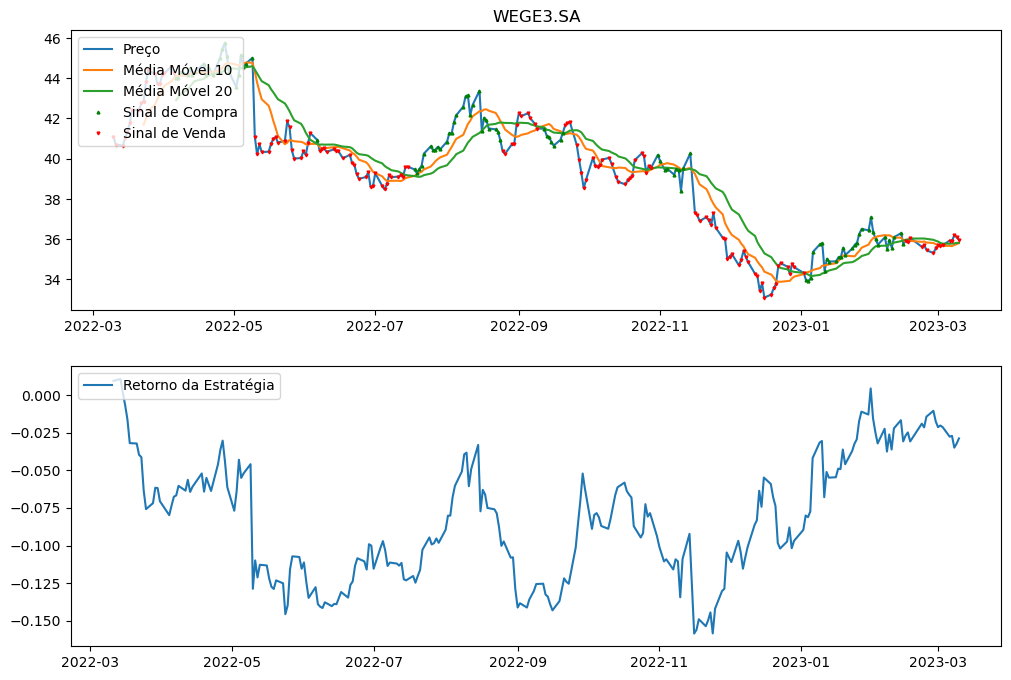

In [7]:
plt.figure(figsize=(12,8))
plt.subplot(2, 1, 1)
plt.plot(data.index, data['Close'], label='Preço')
plt.plot(data.index, data['SMA10'], label='Média Móvel 10')
plt.plot(data.index, data['SMA20'], label='Média Móvel 20')
plt.plot(data[data['Signal'] == 1].index, 
         data['Close'][data['Signal'] == 1], '^', 
         markersize=2, color='green', label='Sinal de Compra')
plt.plot(data[data['Signal'] == -1].index, 
         data['Close'][data['Signal'] == -1], 'v', 
         markersize=2, color='red', label='Sinal de Venda')
plt.legend(loc='upper left')
plt.title("WEGE3.SA")
plt.subplot(2, 1, 2)
plt.plot(data.index, (1 + data['Return']).cumprod() - 1, 
         label='Retorno da Estratégia')
plt.legend(loc='upper left')
plt.show()